# Introduction aux réseaux de neurones en Python

## MLP vs. Deep Learning

Une librairie comme `scikit-learn` n'est pas orientée vers le Deep Learning. Néanmoins, `scikit-learn` dispose de module permettant la construction de réseaux de neurones peu profonds. A l'inverse des librairies comme `tensorflow`, `pytorch` ont été conçues pour le Deep Learning mais permettent aussi d'entraîner des MLP et au-delà (modèles linéaires, SVM, gradient boosting) au prix d'une flexibilité moins grande qu'en Python. Même si les librairies de Deep Learning fournissent des API Python, il se peut que certaines fonctionnalités et de petites modifications ne soient pas simples car le code source est en C++.

## Première version des MLP pour la classification

### Reproduisons le premier exemple du cours



In [1]:
from sklearn import metrics, datasets

In [2]:
from sklearn.neural_network import MLPClassifier

In [3]:
iris = datasets.load_iris()

Regardons la description des données

In [4]:
print ("Iris data set Description :: ", iris['DESCR'])

Iris data set Description ::  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== 

Il y a 4 variables d'entrée

In [5]:
X=iris.data

On stocke le numéro de la classe dans y, il varie entre 0 et 2

In [6]:
y=iris.target

Traçons les données

In [7]:
import matplotlib.pyplot as plt

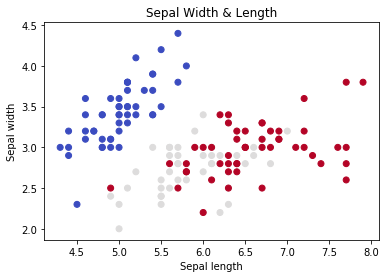

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal Width & Length')
plt.show()

Séparons les 150 données en 75 données d'apprentissage et 75 de test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Construisons un MLP pour la classification des données avec 2 neurones cachés et une pénalisation sur les poids de 0.01

In [11]:
mlp_iris=MLPClassifier(solver='lbfgs', alpha=0.01,
...                     hidden_layer_sizes=(2,), random_state=1)

In [12]:
mlp_iris.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Faisons maintenant la prédiction sur la base de test

In [13]:
y_pred=mlp_iris.predict(X_test)

Traçons la matrice de confusion

In [14]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n%s" % cm)

Confusion matrix:
[[23  0  0]
 [ 0 26  0]
 [ 0 26  0]]


**Exercice** : Tester sans pénalisation et avec seulement 25 exemples dans la base d'apprentissage

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.167)

In [16]:
mlp_iris=MLPClassifier(solver='lbfgs', alpha=0,
...                     hidden_layer_sizes=(2,), random_state=1)

In [17]:
mlp_iris.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [18]:
y_pred = mlp_iris.predict(X_test)

In [19]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n%s" % cm)

Confusion matrix:
[[ 7  0  0]
 [ 0  0 13]
 [ 0  0  6]]


## Première version des MLP pour la régression

### Reproduisons le deuxième exemple du cours

In [20]:
from math import *

In [21]:
import numpy as np

In [22]:
from sklearn.neural_network import MLPRegressor

Définissons la fonction f1

In [23]:
def f1(x):
    x1=x[:,0]
    x2=x[:,1]
    x3=x[:,2]
    return np.sin(x1)/x1+0.1*x3**4+2*np.sin(x2)**2

Définissons les données d'entrée qui suivent une loi uniforme entre - Pi et Pi

In [24]:
x=np.random.uniform(-pi,pi,450)

In [25]:
x=np.reshape(x,(150,3))

In [26]:
y=f1(x)

In [27]:
from sklearn.model_selection import train_test_split

Séparons les 150 données avec 1/4 de données test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

Construction du réseau

In [29]:
nnet=MLPRegressor(hidden_layer_sizes=(11,),max_iter=1000,activation='tanh',alpha=0.01,solver='lbfgs')

Apprentissage

In [30]:
nnet.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(11,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

Prédiction

In [31]:
y_pred=nnet.predict(X_test)

Visualisation

In [32]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\twang\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['log', 'sinh', 'tan', 'nan', 'e', 'gamma', 'radians', 'degrees', 'fmod', 'isinf', 'log2', 'cosh', 'ldexp', 'modf', 'isfinite', 'cm', 'sqrt', 'isnan', 'trunc', 'fabs', 'pi', 'ceil', 'isclose', 'remainder', 'copysign', 'tanh', 'gcd', 'cos', 'log1p', 'hypot', 'sin', 'inf', 'floor', 'expm1', 'log10', 'frexp', 'exp']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


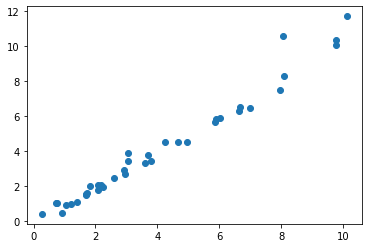

In [33]:
plt.plot(y_pred, y_test,'o')

Calcul du coefficient de détermination R2

In [34]:
from sklearn.metrics import r2_score

In [35]:
r2_score(y_test,y_pred)

0.9655165909148403

Validation croisée

In [36]:
from sklearn.model_selection import KFold, cross_val_score

In [37]:
kf = KFold(n_splits=5, shuffle=True)

In [38]:
print(cross_val_score(nnet, x, y, cv=kf))  

[0.99726386 0.91910021 0.99457385 0.98787672 0.99737256]


**Exercice** : Tester sans pénalisation et avec différents nombres de neurones cachés

In [39]:
nnet_new = MLPRegressor(hidden_layer_sizes=(11,), max_iter=15000, activation='tanh', alpha=0,solver='lbfgs')

In [40]:
nnet_new.fit(X_train, y_train)

MLPRegressor(activation='tanh', alpha=0, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(11,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=15000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [41]:
y_pred_new = nnet_new.predict(X_test)

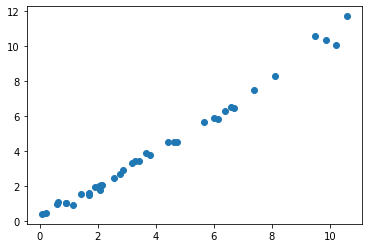

In [42]:
plt.plot(y_pred_new, y_test, 'o')

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test,y_pred_new)

0.9894738304037083

In [45]:
from sklearn.model_selection import KFold, cross_val_score

In [46]:
kf = KFold(n_splits=5, shuffle=True)

In [47]:
print(cross_val_score(nnet_new, x, y, cv=kf))  

[ 0.99958486  0.99872726  0.99919083  0.90736148 -0.51509703]


### Essai sur la base de chiffres MNIST

In [48]:
import numpy as np 
import matplotlib.pyplot as plt

On importe les données

In [52]:
mnist_train_data = np.loadtxt("mnist_train.csv", 
                        delimiter=",",
                             skiprows=1)
mnist_test_data = np.loadtxt("mnist_test.csv", 
                       delimiter=",",
                            skiprows=1) 

Format des données

In [53]:
print("Image Data Shape" , mnist_train_data.shape)

Image Data Shape (60000, 785)


In [54]:
print("Label Data Shape", mnist_test_data.shape)

Label Data Shape (10000, 785)


Les données sont des images 28 par 28 - première colonne = label

On visualise une des données

In [55]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


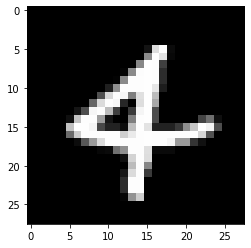

In [56]:
plt.figure()
image=mnist_train_data[150,1:785]
plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)


In [57]:
print(mnist_train_data[:,0])

[5. 0. 4. ... 5. 6. 8.]


On construit un MLP

In [58]:
from sklearn.neural_network import MLPClassifier

In [59]:
classif = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(256,), random_state=1, alpha=0.005)

In [71]:
classif.fit(mnist_train_data[:,1:785], mnist_train_data[:,0])   


MLPClassifier(activation='relu', alpha=0.005, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(256,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [72]:
y_pred = classif.predict(mnist_test_data[:,1:785])

In [73]:
print('Test accuracy:', classif.score(mnist_test_data[:,1:785], mnist_test_data[:,0]))

Test accuracy: 0.4011


In [74]:
from sklearn import metrics

In [75]:
cm = metrics.confusion_matrix(mnist_test_data[:,0], y_pred)
print("Confusion matrix:\n%s" % cm)

Confusion matrix:
[[807   1   0   2   1   0  12 133   0  24]
 [ 19 888   0   7  13   0   6  93   0 109]
 [259  80   1  80 107   0 183 181   0 141]
 [184  82   0 407   7   0  86 119   0 125]
 [ 17   3   0   3 128   0  24 220   0 587]
 [325  20   0  73  16  14  62 205   0 177]
 [164   7   0   4  56   0 442  63   0 222]
 [ 14  12   0   4   7   0   5 895   0  91]
 [159 145   0 107  35   1  82 254   0 191]
 [ 22   4   0   9  20   0   6 519   0 429]]


Visualisation avec t-SNE

In [76]:
from sklearn.manifold import TSNE

In [80]:
tsne=TSNE(n_components=2, random_state=1)

In [81]:
X_2d=tsne.fit_transform(mnist_test_data[0:1000,1:785])

In [82]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


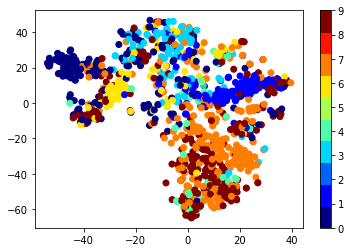

In [83]:
plt.scatter(X_2d[:,0], X_2d[:,1], c=y_pred[0:1000], cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))

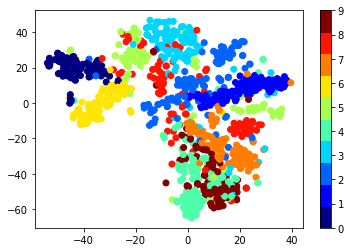

In [84]:
plt.scatter(X_2d[:,0], X_2d[:,1], c=mnist_test_data[0:1000,0], cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))